# Test parameter shift using qiskit circuit

In [2]:
import numpy as np
from qiskit import *
from qiskit.tools.monitor import job_monitor
#import qiskit.tools.jupyter
from qiskit.tools.visualization import circuit_drawer, plot_histogram

## Target

Minimize the energy of two qubit going through one X gate using parameter shift rule


In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
qc.rxx(np.pi/2,1,0)
qc.ryy(np.pi/2,1,0)
qc.measure(q,c)
qc.draw()


┌───────────┐┌───────────┐┌─┐   
q0_0: ┤1          ├┤1          ├┤M├───
      │  Rxx(π/2) ││  Ryy(π/2) │└╥┘┌─┐
q0_1: ┤0          ├┤0          ├─╫─┤M├
      └───────────┘└───────────┘ ║ └╥┘
c0: 2/═══════════════════════════╩══╩═
                                 0  1

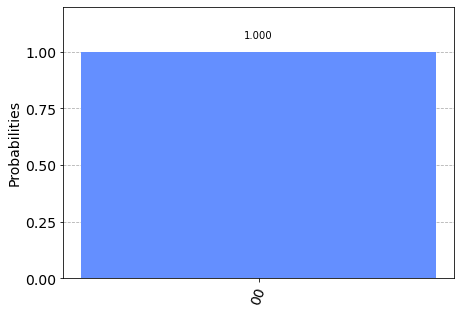

In [4]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=100)
plot_histogram(job.result().get_counts(qc))

## Create a variational ensemble
using $Z$ gate

In [20]:
N = 4
q = QuantumRegister(N)
c = ClassicalRegister(N)
qc = QuantumCircuit(q,c)

thetas = np.random.rand(3 * N)
for i in range(N):
    qc.rx(thetas[i] * np.pi/2,i)
    qc.ry(thetas[i] * np.pi/2,i)
    qc.rz(thetas[i] * np.pi/2,i)

qc.measure(q,c)
qc.draw()


┌─────────────┐ ┌─────────────┐ ┌─────────────┐ ┌─┐         
q46_0: ┤ Rx(0.78823) ├─┤ Ry(0.78823) ├─┤ Rz(0.78823) ├─┤M├─────────
       ├─────────────┴┐├─────────────┴┐├─────────────┴┐└╥┘┌─┐      
q46_1: ┤ Rx(0.023384) ├┤ Ry(0.023384) ├┤ Rz(0.023384) ├─╫─┤M├──────
       ├─────────────┬┘├─────────────┬┘├─────────────┬┘ ║ └╥┘┌─┐   
q46_2: ┤ Rx(0.65722) ├─┤ Ry(0.65722) ├─┤ Rz(0.65722) ├──╫──╫─┤M├───
       └┬────────────┤ └┬────────────┤ └┬────────────┤  ║  ║ └╥┘┌─┐
q46_3: ─┤ Rx(1.1457) ├──┤ Ry(1.1457) ├──┤ Rz(1.1457) ├──╫──╫──╫─┤M├
        └────────────┘  └────────────┘  └────────────┘  ║  ║  ║ └╥┘
c11: 4/═════════════════════════════════════════════════╩══╩══╩══╩═
                                                        0  1  2  3

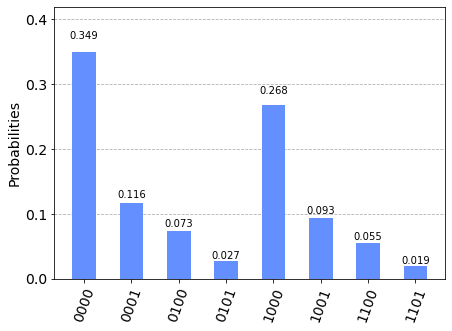

In [32]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
plot_histogram(job.result().get_counts(qc))

In [42]:
sigma_z = np.array([[1,0],[0,-1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,1],[1,0]])

spin = np.array([0,1])
spin_up = np.array([[1],[0]])
spin_down= np.array([[0],[1]])

In [41]:
def state_to_vec(s):
    # return a probability with the corresponding state
    if s[0] == '1':
        state = spin_up
        state_mat = spin_up
    else:
        state = spin_down
        state_mat = spin_down
    
    for curr in s[1:]:
        if curr == '1':
            state = np.kron(state,spin_up)
            state_mat = np.hstack((state_mat,spin_up))
        else:
            state = np.kron(state,spin_down)
            state_mat = np.hstack((state_mat,spin_down))
    
    return state,state_mat

In [39]:
res = job.result().get_counts(qc)

In [40]:
res.get('0000',0)

349